In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [243]:
# Read HouseTS.csv into area_df
area_df = pd.read_csv('../raw_data/HouseTS.csv')

# Read realtor-data.csv into house_df
house_df = pd.read_csv('../raw_data/realtor-data.csv')

In [244]:
# Get the latest twelve month of 'median_sale_price' per 'zipcode' from area_df
last_twelve_month_df = area_df[area_df['date'] == '2023-12-31'].copy()
last_twelve_month_df = last_twelve_month_df[['zipcode', 'median_sale_price']]

In [245]:
# Create list of unique zipcodes in area_df
unique_zipcodes_area_df = area_df['zipcode'].unique().tolist()

# Filter house_df by unique_zipcoes_area_df
house_df = house_df[house_df['zip_code'].isin(unique_zipcodes_area_df)]

In [246]:
# Assuming filtered_house_df and last_twelve_month_df are your DataFrames
# Merge filtered_house_df with last_twelve_month_df on zip_code
merged_df = house_df.merge(
    last_twelve_month_df[['zipcode', 'median_sale_price']],
    left_on='zip_code',
    right_on='zipcode',
    how='left'
)

# Drop the redundant zipcode column (from last_twelve_month_df)
merged_df = merged_df.drop(columns=['zipcode'], errors='ignore')

In [272]:
# Drop columns 'street', 'city', 'state' and 'prev_sold_date'
filtered_house_df = merged_df.drop(columns=['street', 'city', 'state', 'prev_sold_date', 'brokered_by', 'status'])

# Drop duplicates
filtered_house_df = filtered_house_df.drop_duplicates()

# Drop rows with NaN values from 'price'
filtered_house_df = filtered_house_df.dropna(subset=['price'])

# Create list where 'bed' & 'bath' & 'house_size' are NaN
nan_values = filtered_house_df[
    (pd.isna(filtered_house_df['bed'])) &
    (pd.isna(filtered_house_df['bath'])) &
    (pd.isna(filtered_house_df['house_size']))
]

# Filter out rows that are in nan_values
cleaned_house_df = filtered_house_df[~filtered_house_df.index.isin(nan_values.index)]

# Calculate boundaries for 'price', 'acre_lot', 'house_size'
Q1_price = cleaned_house_df['price'].quantile(0.03)
Q3_price = cleaned_house_df['price'].quantile(0.97)
Q3_house_size = cleaned_house_df['house_size'].quantile(0.99)
Q1_acre_lot = cleaned_house_df['acre_lot'].quantile(0.01)
Q3_acre_lot = cleaned_house_df['acre_lot'].quantile(0.99)


# Apply boundaries to clean_house_df
cleaned_house_df = cleaned_house_df[
    (cleaned_house_df['price'] > Q1_price) &
    (cleaned_house_df['price'] < Q3_price) &
    (cleaned_house_df['bed'] < 14) &
    (cleaned_house_df['bath'] < 12) &
    (cleaned_house_df['house_size'] < Q3_house_size) &
    (cleaned_house_df['median_sale_price'] > 50000) &
    (cleaned_house_df['acre_lot'] > Q1_acre_lot) &
    (cleaned_house_df['acre_lot'] < Q3_acre_lot)
    ]

# Price per square foot of the house
cleaned_house_df['ppsf_house'] = round(cleaned_house_df['price'] / cleaned_house_df['house_size'], 2)

# Price per acre of the lot (if lot_sqft is in square feet, 1 acre = 43560 sq ft)
cleaned_house_df['ppa_lot'] = round(cleaned_house_df['price'] / cleaned_house_df['acre_lot'], 2)

# Calculate boundaries for 'ppa_lot'
Q1_ppa_lot = cleaned_house_df['ppa_lot'].quantile(0.05)
Q3_ppa_lot = cleaned_house_df['ppa_lot'].quantile(0.95)
Q1_ppsf_house = cleaned_house_df['ppsf_house'].quantile(0.01)
Q3_ppsf_house = cleaned_house_df['ppsf_house'].quantile(0.99)

# Apply boundaries to clean_house_df
cleaned_house_df = cleaned_house_df[
    (cleaned_house_df['ppa_lot'] > Q1_ppa_lot) &
    (cleaned_house_df['ppa_lot'] < Q3_ppa_lot) &
    (cleaned_house_df['ppsf_house'] > Q1_ppsf_house) &
    (cleaned_house_df['ppsf_house'] < Q3_ppsf_house)
    ]

# Impute NaN values in 'bed' and 'bath' with their medians
cleaned_house_df['bed'] = cleaned_house_df['bed'].fillna(cleaned_house_df['bed'].median())
cleaned_house_df['bath'] = cleaned_house_df['bath'].fillna(cleaned_house_df['bath'].median())

# Impute house_size with median
cleaned_house_df['house_size'] = cleaned_house_df['house_size'].fillna(cleaned_house_df['house_size'].median())

In [ ]:
def clean_data(df):
    # Drop columns 'street', 'city', 'state' and 'prev_sold_date'
    filtered_house_df = df.drop(columns=['street', 'city', 'state', 'prev_sold_date', 'brokered_by', 'status'])

    # Drop duplicates
    filtered_house_df = filtered_house_df.drop_duplicates()

    # Drop rows with NaN values from 'price'
    filtered_house_df = filtered_house_df.dropna(subset=['price'])

    # Create list where 'bed' & 'bath' & 'house_size' are NaN
    nan_values = filtered_house_df[
        (pd.isna(filtered_house_df['bed'])) &
        (pd.isna(filtered_house_df['bath'])) &
        (pd.isna(filtered_house_df['house_size']))
    ]

    # Filter out rows that are in nan_values
    cleaned_house_df = filtered_house_df[~filtered_house_df.index.isin(nan_values.index)]

    # Calculate boundaries for 'price', 'acre_lot', 'house_size'
    Q1_price = cleaned_house_df['price'].quantile(0.03)
    Q3_price = cleaned_house_df['price'].quantile(0.97)
    Q3_house_size = cleaned_house_df['house_size'].quantile(0.99)
    Q1_acre_lot = cleaned_house_df['acre_lot'].quantile(0.01)
    Q3_acre_lot = cleaned_house_df['acre_lot'].quantile(0.99)



    # Apply boundaries to clean_house_df
    cleaned_house_df = cleaned_house_df[
        (cleaned_house_df['price'] > Q1_price) &
        (cleaned_house_df['price'] < Q3_price) &
        (cleaned_house_df['bed'] < 14) &
        (cleaned_house_df['bath'] < 12) &
        (cleaned_house_df['house_size'] < Q3_house_size) &
        (cleaned_house_df['median_sale_price'] > 50000) &
        (cleaned_house_df['acre_lot'] > Q1_acre_lot) &
        (cleaned_house_df['acre_lot'] < Q3_acre_lot)
        ]

    # Price per square foot of the house
    cleaned_house_df['ppsf_house'] = round(cleaned_house_df['price'] / cleaned_house_df['house_size'], 2)

    # Price per acre of the lot (if lot_sqft is in square feet, 1 acre = 43560 sq ft)
    cleaned_house_df['ppa_lot'] = round(cleaned_house_df['price'] / cleaned_house_df['acre_lot'], 2)

    # Calculate boundaries for 'ppa_lot'
    Q1_ppa_lot = cleaned_house_df['ppa_lot'].quantile(0.05)
    Q3_ppa_lot = cleaned_house_df['ppa_lot'].quantile(0.95)
    Q1_ppsf_house = cleaned_house_df['ppsf_house'].quantile(0.01)
    Q3_ppsf_house = cleaned_house_df['ppsf_house'].quantile(0.99)


    # Apply boundaries to clean_house_df
    cleaned_house_df = cleaned_house_df[
        (cleaned_house_df['ppa_lot'] > Q1_ppa_lot) &
        (cleaned_house_df['ppa_lot'] < Q3_ppa_lot) &
        (cleaned_house_df['ppsf_house'] > Q1_ppsf_house) &
        (cleaned_house_df['ppsf_house'] < Q3_ppsf_house)
        ]

    # Impute NaN values in 'bed' and 'bath' with their medians
    cleaned_house_df['bed'] = cleaned_house_df['bed'].fillna(cleaned_house_df['bed'].median())
    cleaned_house_df['bath'] = cleaned_house_df['bath'].fillna(cleaned_house_df['bath'].median())

    # Impute house_size with median
    cleaned_house_df['house_size'] = cleaned_house_df['house_size'].fillna(cleaned_house_df['house_size'].median())

    return cleaned_house_df

In [274]:


cleaned_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461501 entries, 0 to 936722
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              461501 non-null  float64
 1   bed                461501 non-null  float64
 2   bath               461501 non-null  float64
 3   acre_lot           461501 non-null  float64
 4   zip_code           461501 non-null  float64
 5   house_size         461501 non-null  float64
 6   median_sale_price  461501 non-null  float64
 7   ppsf_house         461501 non-null  float64
 8   ppa_lot            461501 non-null  float64
dtypes: float64(9)
memory usage: 35.2 MB


In [13]:
import pgeocode

In [15]:
# Convert zip_code column to 5-digit string
filtered_house_df['zip_code'] = filtered_house_df['zip_code'].astype(str).str.replace('\.0$', '', regex=True).str.zfill(5)
# Get unique zip codes
unique_zips = filtered_house_df['zip_code'].unique()
# Initialize pgeocode for US
nomi = pgeocode.Nominatim('us')
# Function to get coordinates
def get_coordinates(zip_code):
    try:
        result = nomi.query_postal_code(zip_code)
        if result.empty or pd.isna(result.latitude):
            return pd.Series([None, None])
        return pd.Series([result.latitude, result.longitude])
    except:
        return pd.Series([None, None])
# Create DataFrame for unique zip codes
zip_coords = pd.DataFrame(unique_zips, columns=['zip_code'])
zip_coords[['latitude', 'longitude']] = zip_coords.apply(lambda row: get_coordinates(row['zip_code']), axis=1)
# Map coordinates back to filtered_house_df
coords_dict = zip_coords.set_index('zip_code')[['latitude', 'longitude']].to_dict('index')
filtered_house_df['latitude'] = filtered_house_df['zip_code'].map(lambda x: coords_dict.get(x, {}).get('latitude'))
filtered_house_df['longitude'] = filtered_house_df['zip_code'].map(lambda x: coords_dict.get(x, {}).get('longitude'))
# Check for missing coordinates
print(filtered_house_df[['latitude', 'longitude']].isna().sum())

latitude     0
longitude    0
dtype: int64


In [19]:
#filtered_house_df = filtered_house_df.drop(columns=['zip_code'])
filtered_house_df

,price,bed,bath,acre_lot,house_size,ppsf_house,ppa_lot,latitude,longitude
5199,333490.0,3.0,3.0,0.07,1500.0,222.33,4764142.86,40.0680,-74.8454
10718,299900.0,2.0,1.0,4.99,1590.0,188.62,60100.20,42.6745,-71.8174
10719,599900.0,3.0,4.0,13.21,2224.0,269.74,45412.57,42.6745,-71.8174
10720,549900.0,5.0,4.0,1.60,3574.0,153.86,343687.50,42.6745,-71.8174
10721,269000.0,3.0,2.0,1.85,1762.0,152.67,145405.41,42.6745,-71.8174
...,...,...,...,...,...,...,...,...,...
2220311,1350000.0,3.0,4.0,0.16,3200.0,421.88,8437500.00,45.5959,-122.3104
2220312,824900.0,4.0,5.0,5.00,4015.0,205.45,164980.00,45.5959,-122.3104
2220313,1700000.0,4.0,5.0,5.03,4266.0,398.50,337972.17,45.5959,-122.3104
2220330,524900.0,3.0,3.0,0.12,2172.0,241.67,4374166.67,45.6892,-122.6616


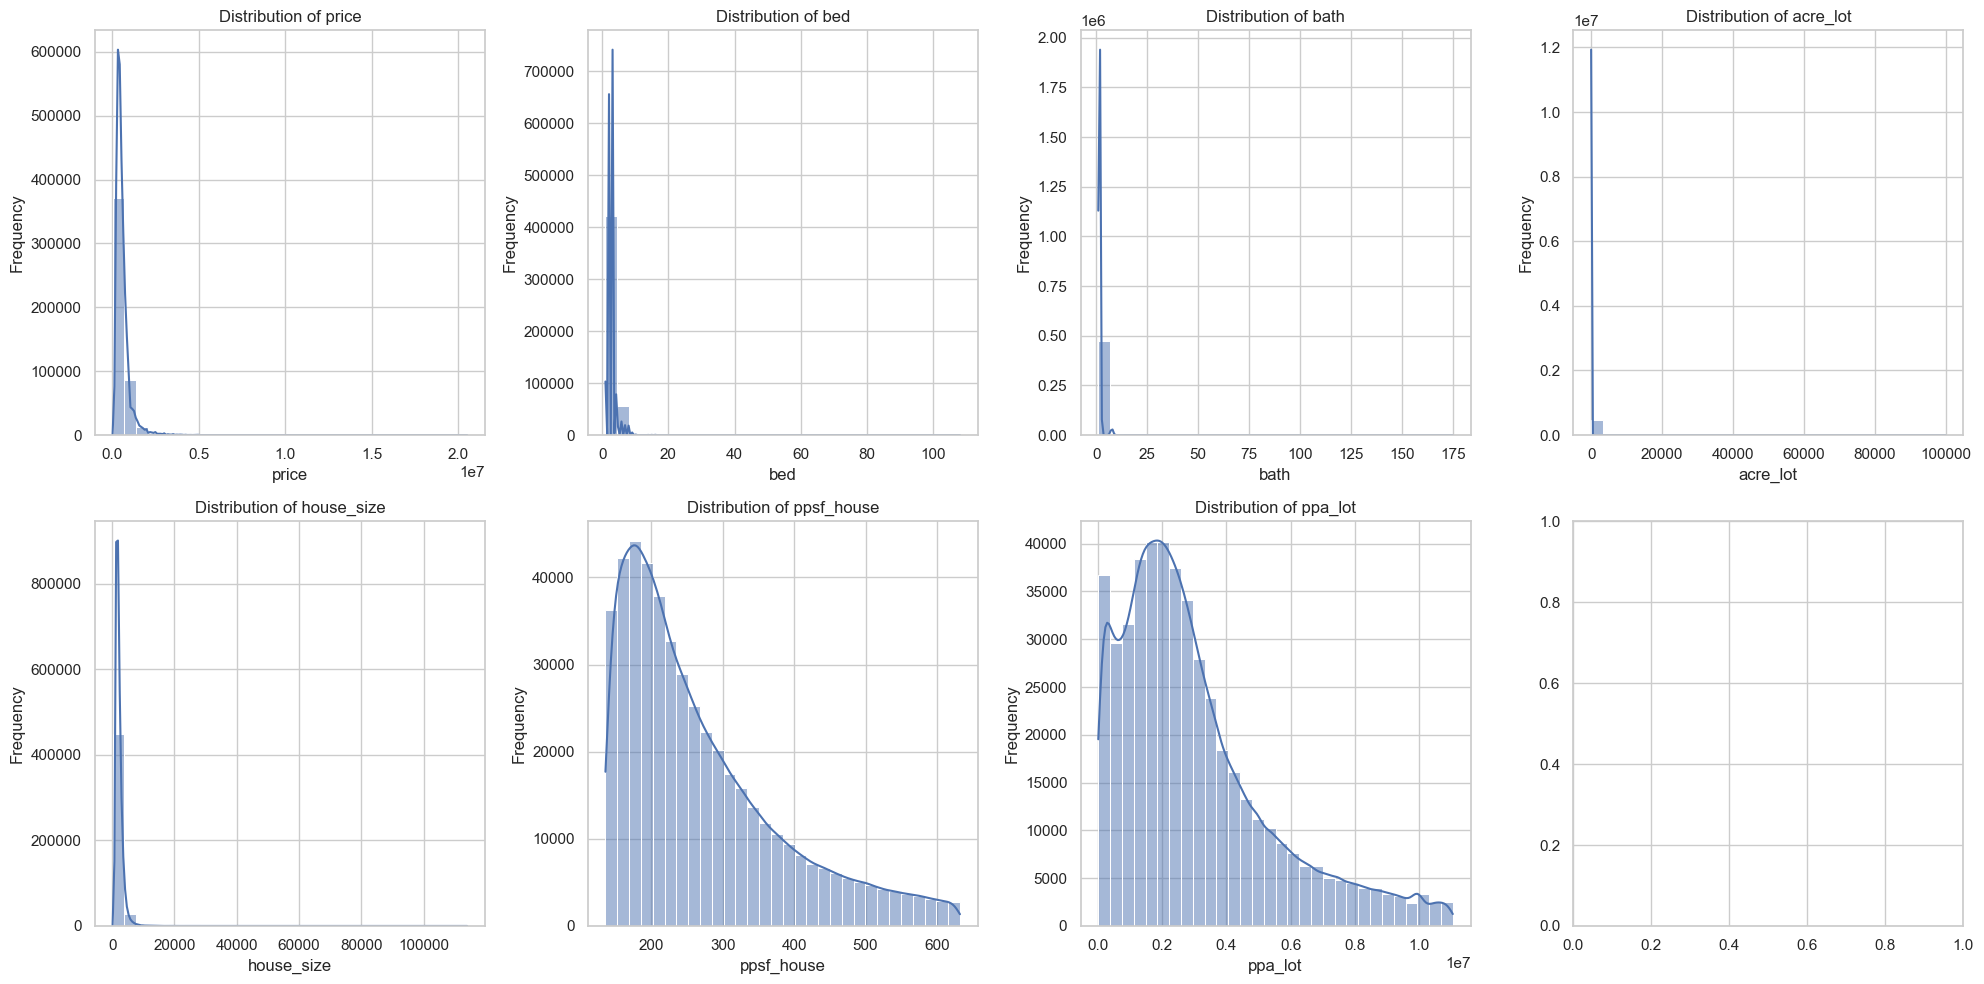

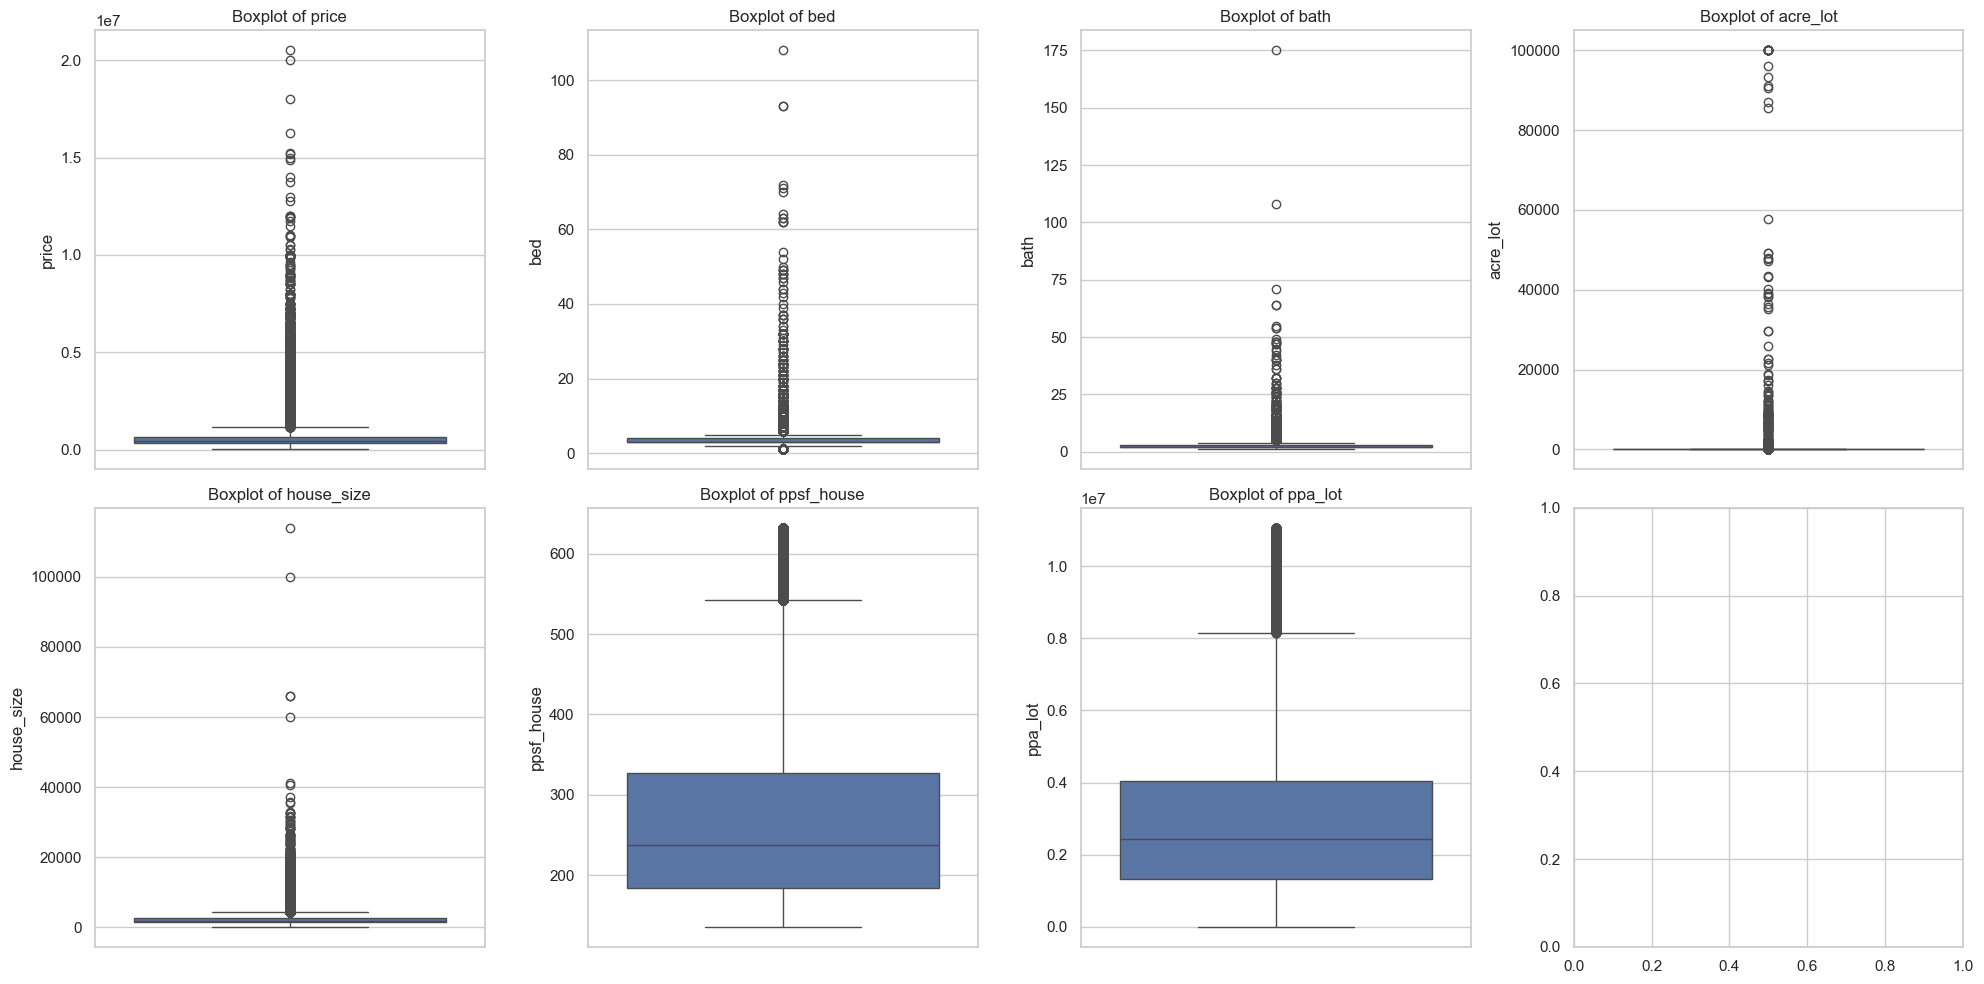

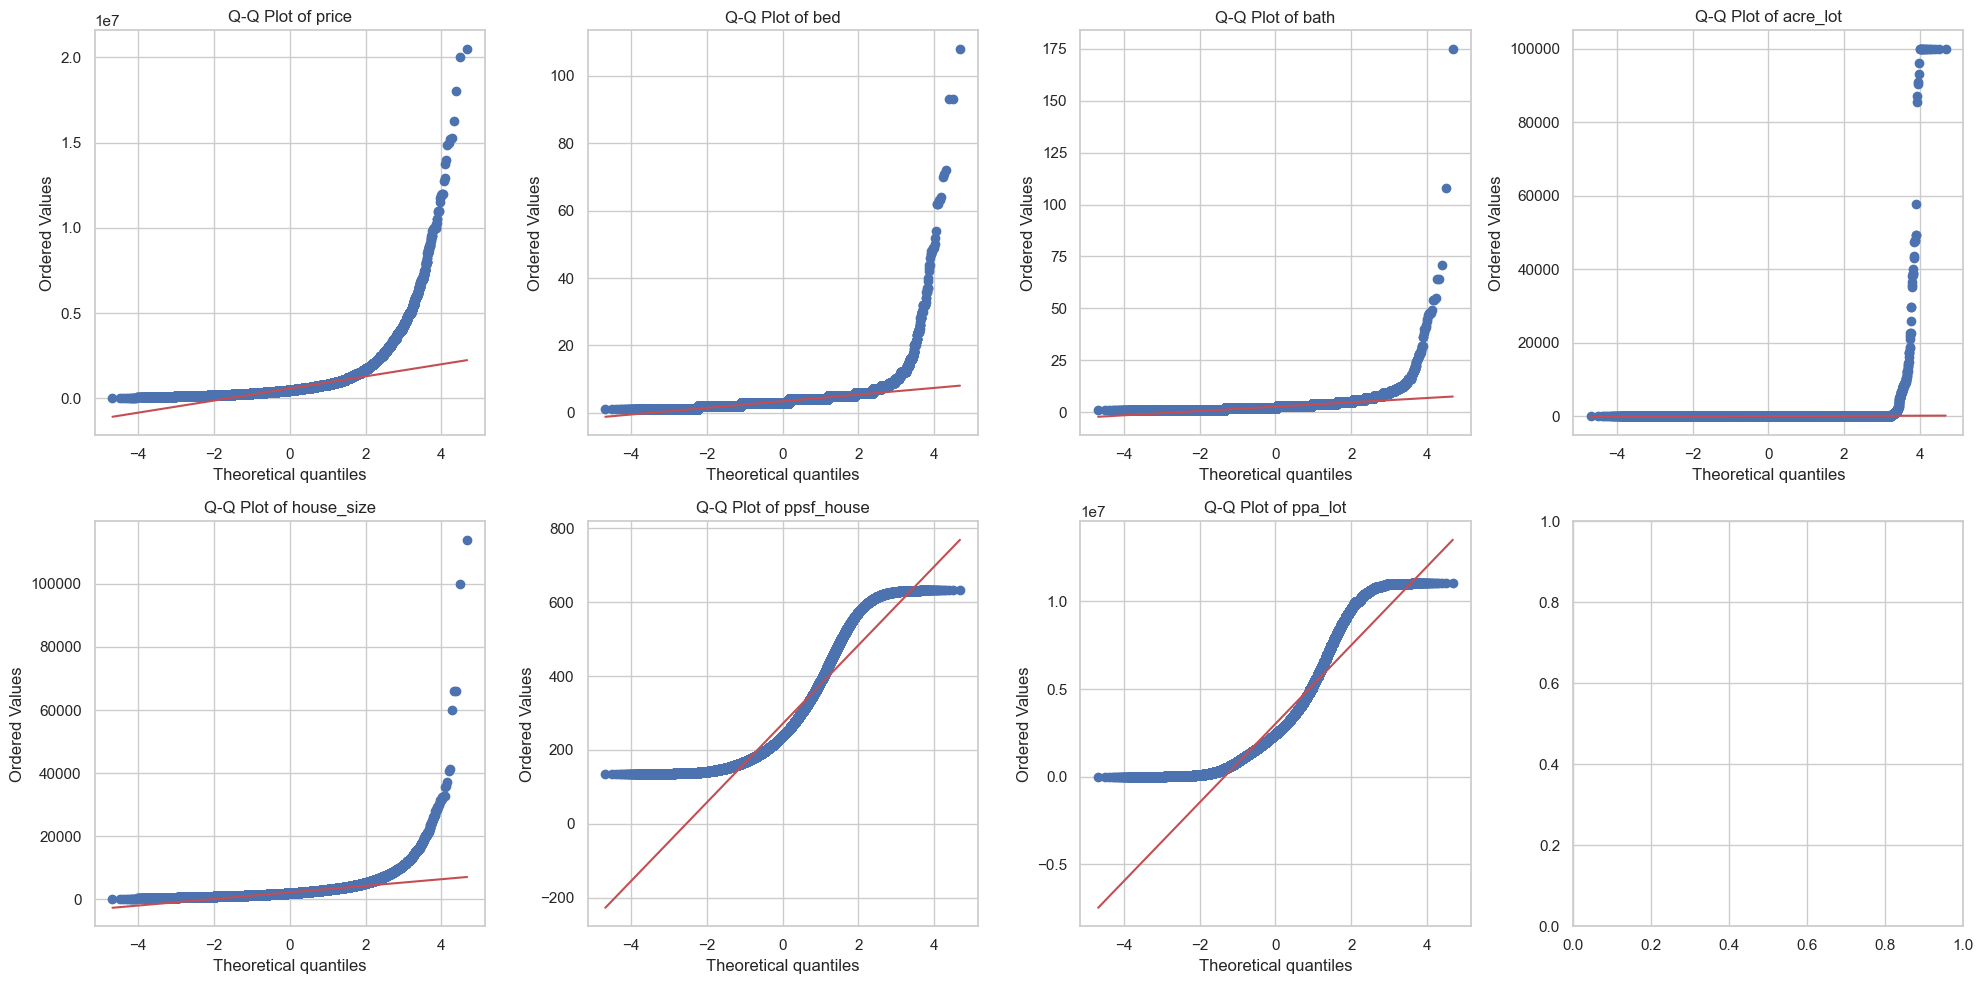

In [26]:
import scipy.stats as stats

# Select numeric columns
numeric_cols = ['price', 'bed', 'bath', 'acre_lot', 'house_size', 'ppsf_house', 'ppa_lot']
# Set up the plotting environment
sns.set(style="whitegrid")

# 1. Histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(filtered_house_df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Boxplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=filtered_house_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

# 3. Q-Q Plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    stats.probplot(filtered_house_df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot of {col}')
plt.tight_layout()
plt.show()